THIS NOTEBOOK IMPLEMENT THE BACK TESTING LOGIC FROM THE SRC BACKTESTING FILE

1.The function called first identifiies trading opportunities based on Z-Score 
for each days and pairs

2.once it has detected a spread with enough magnitude, it checks if the models agrees with the mean-reverison hypothesis

The trades only take place if the ML model predicts the spread will snap back to the mean

3.the function also manage a hybrid model, where trade are activated only when both LSTM/Ridge models agree on prediction


In [13]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

# Add the 'src' directory to the path so we can import the engine module from src folder
sys.path.append(os.path.abspath('..'))
from src.backtesting_engine import StrategyEngine
from src.portfolio import PortfolioManager

# Define paths
PREDICTIONS_PATH = '../data/processed/05_model_predictions.csv'

# Check if file exists before running
if not os.path.exists(PREDICTIONS_PATH):
    print(f" Error: Predictions file not found at {PREDICTIONS_PATH}")
    print("   Please run '03.1_prediction_generation.ipynb' first.")
else:
    print(f"Found predictions file. Ready to backtest.")

Found predictions file. Ready to backtest.


Running Strategy Analysis...
RUNNING STRATEGY (Threshold: Z > 1.5 / Z < -1.5)
   Actionable Opportunities: 593 (24.7% of days)


,Total_Trades,Win_Rate,Long_WR,Short_WR
Model,,,,
Ridge,547,62.16%,62.84%,61.54%
LSTM,436,64.45%,63.75%,65.41%
Hybrid,429,64.34%,63.67%,65.22%



💰 SIMULATING REAL PORTFOLIO (Capital: $100, Cost: $2.0)

 STRATEGY PERFORMANCE REPORT

Plot saved to: ../results\equity_curve.png


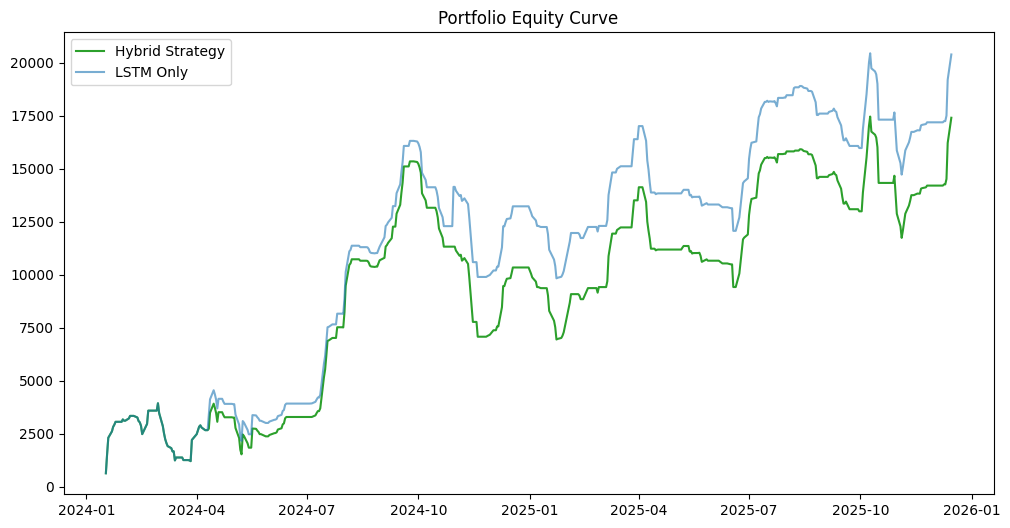

✅ Performance metrics saved to: ../results\strategy_performance.csv


In [22]:
PREDICTIONS_PATH = '../data/processed/05_model_predictions.csv' 
OUTPUT_DIR = '../results'  # Folder to save your results
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 1. Initialize the Strategy Engine
# We use a Z-Score of 1.5, meaning we only trade when the pair is significantly stretched.
engine = StrategyEngine(predictions_path=PREDICTIONS_PATH, z_threshold=1.5)


# 2. Execute the Backtest, run the strategy
print("Running Strategy Analysis...")
performance_df = engine.run_backtest()

format_dict = {
    'Total_Trades': '{:.0f}',    
    'Win_Rate': '{:.2%}',        
    'Long_WR': '{:.2%}',
    'Short_WR': '{:.2%}'
}
# Format as percentages for easier reading
display(performance_df.style.format(format_dict))


#run financial simulation from portfolio manager
pm = PortfolioManager(engine)

equity_df = pm.calculate_equity_curve(capital_per_trade=100, cost_per_trade=2.0)


# 3. Display the Results Table
print("\n STRATEGY PERFORMANCE REPORT")


#plot simulation results
plt.figure(figsize=(12, 6))
plt.plot(equity_df.index, equity_df['Equity_Hybrid'], label='Hybrid Strategy', color='#2ca02c')
plt.plot(equity_df.index, equity_df['Equity_LSTM'], label='LSTM Only', color='#1f77b4', alpha=0.6)
plt.title("Portfolio Equity Curve")
plt.legend()

plot_path = os.path.join(OUTPUT_DIR, 'equity_curve.png')
plt.savefig(plot_path, dpi=300)  
print(f"\nPlot saved to: {plot_path}")

plt.show()


metrics_path = os.path.join(OUTPUT_DIR, 'strategy_performance.csv')
performance_df.to_csv(metrics_path)
print(f"✅ Performance metrics saved to: {metrics_path}")


SAVE PERFORMANCE TO RESULTS

In [ ]:
source_path = '../data/processed/06_model_metrics.csv'
output_dir = '../results'
output_path = os.path.join(output_dir, 'models_metrics.csv')

# 2. Load the CSV 
df_final = pd.read_csv(source_path)

# 4. Save the table to the output folder
df_final.to_csv(output_path, index=False)

print(f"Table successfully saved to: {output_path}")